<a href="https://colab.research.google.com/github/harishahamed26/PredictionOfHeartRate/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df_HeartRate = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/PredictionOfHeartRate/main/PT_Train.csv')
df_HeartRate.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [55]:
df_HeartRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [56]:
df_HeartRate.isna().sum()

Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

In [57]:
df_HeartRate.head(2)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0


In [65]:


df_HeartRate['Oximeter SpO2']= df_HeartRate['Oximeter SpO2'].fillna(df_HeartRate['Oximeter SpO2'].bfill())
df_HeartRate['Oximeter Pulse'] =df_HeartRate['Oximeter Pulse'].fillna(df_HeartRate['Oximeter Pulse'].bfill())


In [66]:
df_HeartRate.isna().sum()

Timestamp (GMT)               0
Lifetouch Heart Rate          0
Lifetouch Respiration Rate    0
Oximeter SpO2                 0
Oximeter Pulse                0
dtype: int64

In [64]:
df_HeartRate['Oximeter SpO2']= df_HeartRate['Oximeter SpO2'].fillna(df_HeartRate['Oximeter SpO2'].ffill())
df_HeartRate['Oximeter Pulse'] =df_HeartRate['Oximeter SpO2'].fillna(df_HeartRate['Oximeter SpO2'].ffill())

In [62]:
df_HeartRate.isna().sum()

Timestamp (GMT)               0
Lifetouch Heart Rate          0
Lifetouch Respiration Rate    0
Oximeter SpO2                 1
Oximeter Pulse                1
dtype: int64

In [67]:
df_HeartRate['Oximeter SpO2'] = df_HeartRate['Oximeter SpO2'].astype(np.int64)
df_HeartRate['Oximeter Pulse'] = df_HeartRate['Oximeter Pulse'].astype(np.int64)


In [68]:
df_HeartRate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp (GMT)             226 non-null    object
 1   Lifetouch Heart Rate        226 non-null    int64 
 2   Lifetouch Respiration Rate  226 non-null    int64 
 3   Oximeter SpO2               226 non-null    int64 
 4   Oximeter Pulse              226 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ KB


In [69]:
df_HeartRate.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,226.000000,226.000000
mean,2315.615044,2219.216814,73.367257,73.367257
std,11351.588825,11370.093548,39.245581,39.245581
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,92.000000
50%,145.000000,46.000000,93.000000,93.000000
75%,156.000000,53.000000,95.000000,95.000000
max,61442.000000,61442.000000,98.000000,98.000000


In [15]:
df_HeartRate['Timestamp (GMT)'] = df_HeartRate['Timestamp (GMT)'].replace({'/' : '-'} , regex=True)
df_HeartRate['Timestamp (GMT)'] 

0      17-08-2015 15:09
1      17-08-2015 15:10
2      17-08-2015 15:11
3      17-08-2015 15:12
4      17-08-2015 15:13
             ...       
221    17-08-2015 18:50
222    17-08-2015 18:51
223    17-08-2015 18:52
224    17-08-2015 18:53
225    17-08-2015 18:54
Name: Timestamp (GMT), Length: 226, dtype: object

In [16]:
df_HeartRate['Date'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)']).dt.date
df_HeartRate['Time'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)']).dt.time

In [18]:
df_HeartRate.head(2)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Date,Time
0,17-08-2015 15:09,139,41,92,92,2015-08-17,15:09:00
1,17-08-2015 15:10,144,40,92,92,2015-08-17,15:10:00


In [19]:
df_HeartRate.corr()   

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
Lifetouch Heart Rate,1.000000,1.000000,0.023841,0.023841
Lifetouch Respiration Rate,1.000000,1.000000,0.023984,0.023984
Oximeter SpO2,0.023841,0.023984,1.000000,1.000000
Oximeter Pulse,0.023841,0.023984,1.000000,1.000000


In [20]:
df_HeartRate['Step_Count'] = list(range(0, len(df_HeartRate['Timestamp (GMT)'])))

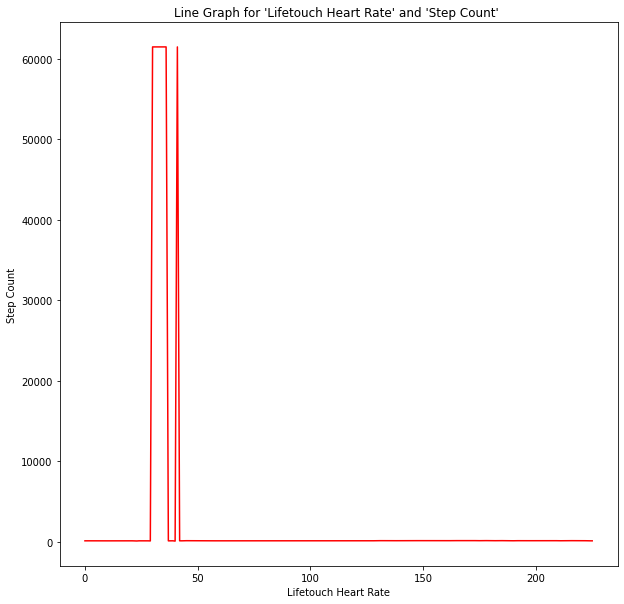

In [21]:
plt.figure(figsize=(10,10))
plt.plot( df_HeartRate['Step_Count'] ,df_HeartRate['Lifetouch Heart Rate'], color = 'Red')
plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
plt.xlabel('Lifetouch Heart Rate')
plt.ylabel('Step Count')
plt.show()

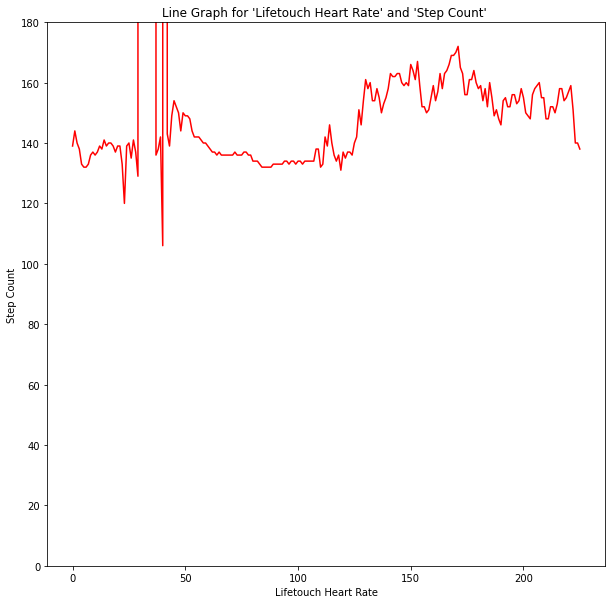

In [22]:
plt.figure(figsize=(10,10))
plt.plot( df_HeartRate['Lifetouch Heart Rate'], color = 'Red')
plt.ylim(0,180)
plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
plt.xlabel('Lifetouch Heart Rate')
plt.ylabel('Step Count')
plt.show()

In [23]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(df_HeartRate['Lifetouch Heart Rate'])

print(f'p value: {p_value}')
print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')



p value: 0.1
Result: The series is stationary 



In [91]:
df_HeartRate.head(2)


,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144


In [71]:
# Convert the month column to a datetime object
df_HeartRate['Timestamp (GMT)'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)'])

# Set the month column as the index
df_HeartRate.set_index('Timestamp (GMT)', inplace=True)

In [83]:
df_HeartRate = df_HeartRate.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2',
       'Oximeter Pulse'], axis = 1)

In [ ]:
#here I have done forecasting with ARMA model
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARMA


# Split the data into training and testing sets
train = df_HeartRate[:'2015-08-17 18:54:00']
test = df_HeartRate['2015-08-17 18:55:00':]

# Fit the ARMA model
model = ARMA(train, order=(50,0,50))
model_fit = model.fit()


In [96]:

# Predict the next quarter of 1961
predictions = model_fit.predict(start='2015-08-17 18:55:00', end='2015-08-17 19:15:00')

In [97]:
predictions

2015-08-17 18:55:00     615.795560
2015-08-17 18:56:00     937.309857
2015-08-17 18:57:00    1270.679997
2015-08-17 18:58:00    1518.301888
2015-08-17 18:59:00    1633.767918
2015-08-17 19:00:00    1861.336546
2015-08-17 19:01:00    2024.041243
2015-08-17 19:02:00    2069.621219
2015-08-17 19:03:00    2101.377298
2015-08-17 19:04:00    2115.480663
2015-08-17 19:05:00    2147.345094
2015-08-17 19:06:00    2226.254774
2015-08-17 19:07:00    2232.619259
2015-08-17 19:08:00    2226.665675
2015-08-17 19:09:00    2249.003788
2015-08-17 19:10:00    2261.610317
2015-08-17 19:11:00    2294.852285
2015-08-17 19:12:00    2305.039763
2015-08-17 19:13:00    2287.685908
2015-08-17 19:14:00    2293.881428
2015-08-17 19:15:00    2304.461218
Freq: T, dtype: float64

In [90]:
# Obtain the AIC and BIC
print('AIC: ', model_fit.aic)
print('BIC: ', model_fit.bic)

AIC:  4687.793805822653
BIC:  4698.05541082047
